# Analysis of Correlation

## Assumptions

A linear coherence between one or more random variables in a sample is investigated quantitatively by analysis of correlation. However, correlation does not return the mathematical equation. The correlation coefficient r is set between -1 and +1. The closer the absolute value is located to 1, the better is the correlation. A negative coefficient implies that the values of one variable are big while the other variable results in small values. A positive coefficient is returned for data in which both variables are big or small. 

The correlation coefficient itself does not state anything about the significance of correlation. Therefore, a test resembling the t-test is used for checking the significance. 

### Pearson

Assumptions for a correlation according to Pearson are:

   * **Normal distributed data**

   * **Independence of observations**
   
Pearson's correlation coefficient is named $\rho$.

### Spearman

Correlation according to Spearman is nonparametric and therefore independent from monotone coordinate transformation. Assumptions: 

  * (Normal distribution of data is not required.)

  * **Independency of observations**

## Implementation

Besides computing correlations coefficients on their own, Python also provides you with results of a test for significance of these coefficients. The hypotheses for a two-sided test are:

$$H_{0}: \rho = 0$$

$$H_{1}: \rho \neq 0$$

### The Function <tt>scipy.stats.pearsonr()</tt>

    scipy.stats.pearsonr(x, y)
    
<tt>x</tt> and <tt>y</tt> are expected to be numpy arrays.


### The Function <tt>scipy.stats.spearman()</tt>

    scipy.stats.spearman(x, y)
    
<tt>x</tt> and <tt>y</tt> are expected to be numpy arrays.

## Example: Broad Beans

A sample of broad beans classified as the variety \textit{Roger's Emperor} was investigated with regard on length and weight (data shown below, Bishop, 1980, p. 64).

In [1]:
import pandas as pd

broad = pd.read_csv('data/broad.csv', sep='\t')
broad

,weight,length
0,0.7,1.7
1,1.2,2.2
2,0.9,2.0
3,1.4,2.3
4,1.2,2.4
5,1.1,2.2
6,1.0,2.0
7,0.9,1.9
8,1.0,2.1
9,0.8,1.6


<AxesSubplot:xlabel='weight', ylabel='length'>

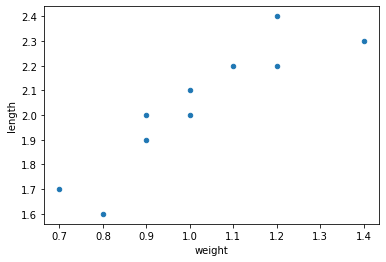

In [2]:
broad.plot.scatter(x = 'weight', y = 'length')

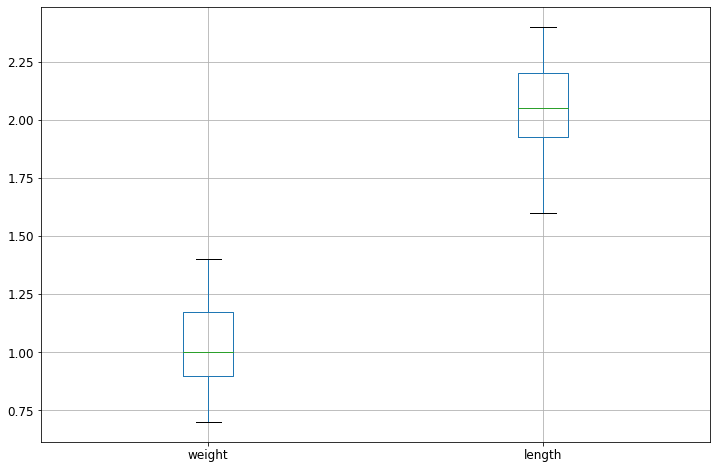

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))
bp = broad.boxplot(fontsize='large', ax=ax)

### Statistical Analysis

   * **Normal distribution** of both variables (see boxplot)
    
   * **Indepency of observations** is assumed.
   
$\Longrightarrow$ Correlation according to Pearson.

In [4]:
import scipy
import scipy.stats

scipy.stats.pearsonr(broad['weight'], broad['length'])

(0.8983172313107092, 0.000413014438551176)

The Pearson correlation with the coefficient 0.8983172313107092 is highly significant with an error probability of 5%.

## Example: Soybeans (2)

"A plant physiologist grew 13 individually potted soybean seedlings in a greenhouse. The data shown below gives measurements of the total leaf area (cm$^{2}$) and total plant dry weight (g) for each plant after 16 days of growth"  (Pappas and Mitchell., 1984, rawdata published in Samuels and Wittmer, 2003, p. 563f).

In [5]:
bean = pd.read_csv('data/bean.csv', sep='\t')
bean

,area,weight
0,411,2.00
1,550,2.47
2,471,2.11
3,393,1.89
4,427,2.05
5,431,2.30
6,492,2.46
7,371,2.06
8,470,2.25
9,419,2.07


<AxesSubplot:xlabel='area', ylabel='weight'>

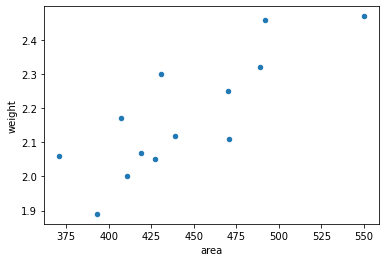

In [6]:
bean.plot.scatter(x = 'area', y = 'weight')

<AxesSubplot:>

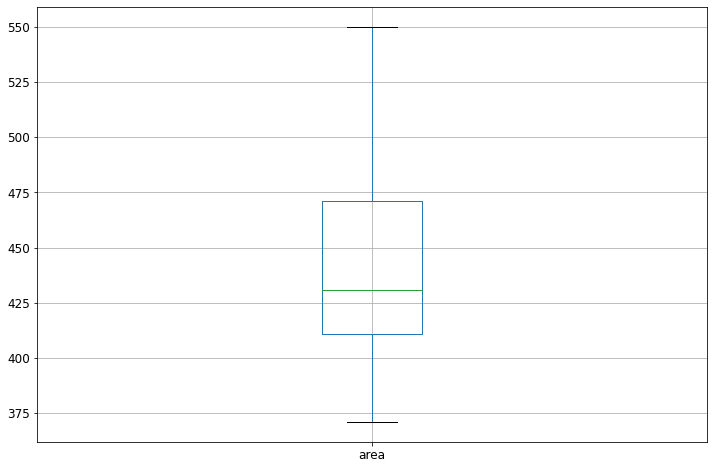

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
bean.boxplot(column = 'area', fontsize='large', ax=ax)

<AxesSubplot:>

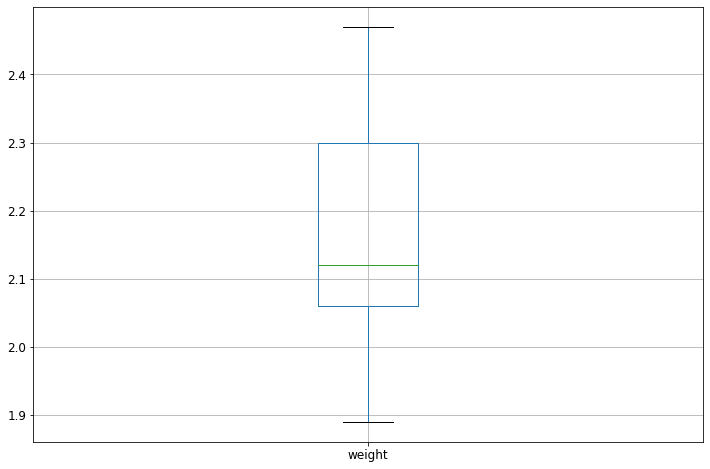

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
bean.boxplot(column = 'weight', fontsize='large', ax=ax)

   * **Normal distribution** is rejected because the median does not lie in the box middle (boxplots).
   
   * **Independency of observations** is assumed.
   
   
$\Longrightarrow$ Spearman's Rank Correlation is calculated:

In [9]:
scipy.stats.spearmanr(bean['area'], bean['weight'])

SpearmanrResult(correlation=0.7967032967032966, pvalue=0.0011136526522685867)

The correlation coefficient $\rho$ is 0.7967032967032966. The correlation is significant with an error probability of 5% because the p-value 0.0011136526522685867 is much smaller than 0.05. 

<font size="3"><div class="alert alert-warning"><b>Exercise 9.1:</b> <br> 
The content of ascorbic acid is measured with a photoelectric absorption meter by using the blue starch-iodine complex. In order to standardize this procedure, samples with a known concentration of ascorbic acid are measured, first (data shown below, Bishop, 1980, p. 70).

Are ascorbic acid concentration and metered values correlated significantly?
</div>
</font>

In [10]:
asc = pd.read_csv('data/ascorbic.csv', sep='\t')
asc

,acid,response
0,150,5.9
1,300,4.8
2,450,3.7
3,600,2.4
4,750,0.9
5,900,0.0



<font size="3">
<b>Try it yourself:</b></font>

<AxesSubplot:xlabel='acid', ylabel='response'>

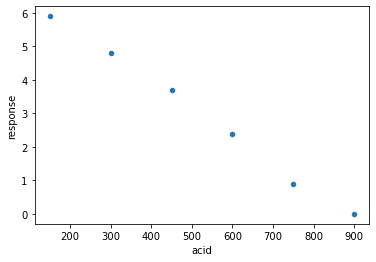

In [11]:
asc.plot.scatter(x = 'acid', y = 'response')

<AxesSubplot:>

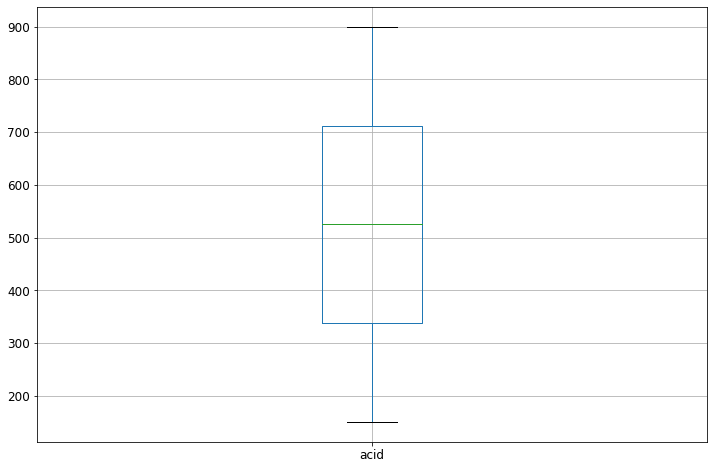

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
asc.boxplot(column = 'acid', fontsize='large', ax=ax)

<AxesSubplot:>

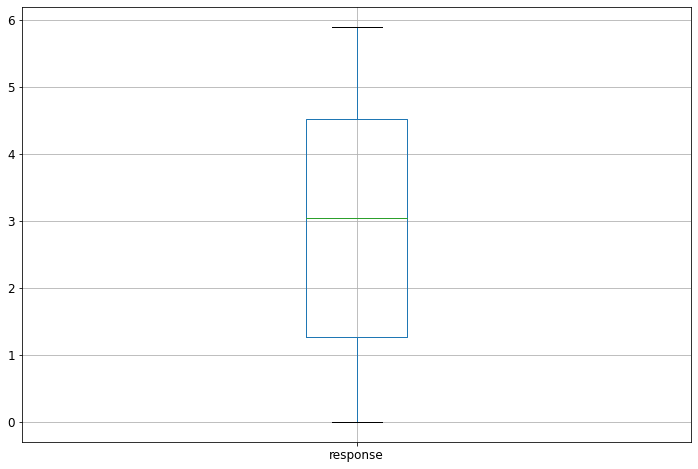

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
asc.boxplot(column = 'response', fontsize='large', ax=ax)

Boxplots show the normal distribution of both variables. Therefore, a correlation according to Pearson is calculated.

In [14]:
scipy.stats.pearsonr(asc['acid'], asc['response'])

(-0.9982330678336611, 4.680315696015582e-06)

The coefficient of -0.9982330678336611 shows an almost perfect negative correlation. The small p-value verifies the significance to a confidence level of 95%.

Further reading: 
    
   * <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html>
    
   * <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html>
    
   * <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html>